In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers import Dense 
from keras.callbacks import EarlyStopping 
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train_final = x_train.reshape((-1, 784)) /255
x_test_final = x_test.reshape((-1, 784)) /255
y_train_final = to_categorical(y_train)
y_test_final = to_categorical(y_test)

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
model = Sequential() 
model.add(Dense(512, kernel_initializer='normal', activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [9]:
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

In [10]:
history = model.fit(x_train_final, y_train_final, batch_size=256, epochs=50, verbose=1, validation_split = 0.2, callbacks = [EarlyStopping(monitor = 'val_loss', patience = 20)])

Epoch 1/50
188/188 [==============================] - 4s 6ms/step - loss: 0.0682 - accuracy: 0.8797 - val_loss: 0.0395 - val_accuracy: 0.9331
Epoch 2/50
188/188 [==============================] - 1s 5ms/step - loss: 0.0199 - accuracy: 0.9668 - val_loss: 0.0236 - val_accuracy: 0.9614
Epoch 3/50
188/188 [==============================] - 1s 5ms/step - loss: 0.0119 - accuracy: 0.9804 - val_loss: 0.0160 - val_accuracy: 0.9726
Epoch 4/50
188/188 [==============================] - 1s 5ms/step - loss: 0.0082 - accuracy: 0.9866 - val_loss: 0.0166 - val_accuracy: 0.9742
Epoch 5/50
188/188 [==============================] - 1s 7ms/step - loss: 0.0055 - accuracy: 0.9914 - val_loss: 0.0173 - val_accuracy: 0.9754
Epoch 6/50
188/188 [==============================] - 1s 6ms/step - loss: 0.0043 - accuracy: 0.9933 - val_loss: 0.0189 - val_accuracy: 0.9758
Epoch 7/50
188/188 [==============================] - 1s 5ms/step - loss: 0.0035 - accuracy: 0.9944 - val_loss: 0.0212 - val_accuracy: 0.9752
Epoch 

In [11]:
score = model.evaluate(x_test_final, y_test_final, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.03724154829978943
Test accuracy: 0.9811999797821045


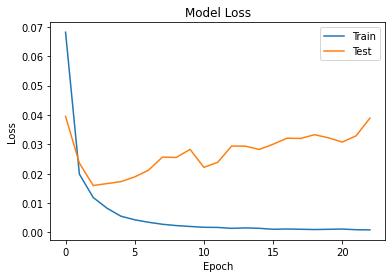

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

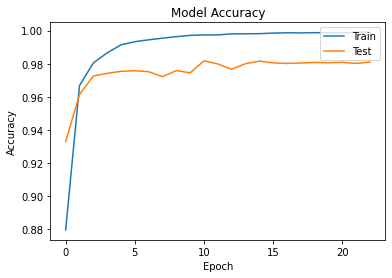

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()